In [418]:
import warnings
warnings.filterwarnings('ignore')
import os 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam
import seaborn as sn 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.feature_selection import chi2,SelectKBest,RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from keras.layers import Dropout
import datetime
from sklearn.ensemble import ExtraTreesClassifier



# Neural network Forest Fires

In [3]:
df = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\neural networks\forestfires.csv")

# Data Exploratory

In [4]:
#read data
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
#checking number of columns 
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
#checking information of our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [10]:
#checking with any duplicate data 
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [11]:
#checking for duplicate values 
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [13]:
#dropping our duplicate columns 
df = df.drop_duplicates()
df.shape

(509, 31)

In [14]:
#checking for any null values 
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [40]:
#assigning unique values to our dependent variable 
df['size_category'] = df['size_category'].map({'small':0,'large':1})
df.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
#checking with descriptive statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,509.0,90.618075,5.555527,18.7,90.2,91.60,92.90,96.20
DMC,509.0,110.235756,63.804112,1.1,62.3,108.30,141.30,291.30
DC,509.0,547.787623,248.196222,7.9,437.7,664.20,713.90,860.60
ISI,509.0,9.023576,4.585083,0.0,6.4,8.40,11.00,56.10
temp,509.0,18.865422,5.841083,2.2,15.4,19.30,22.80,33.30
RH,509.0,44.253438,16.365192,15.0,32.0,42.00,53.00,100.00
wind,509.0,4.011395,1.800926,0.4,2.7,4.00,4.90,9.40
rain,509.0,0.020432,0.296261,0.0,0.0,0.00,0.00,6.40
area,509.0,12.992908,64.133357,0.0,0.0,0.61,6.58,1090.84
dayfri,509.0,0.163065,0.369788,0.0,0.0,0.00,0.00,1.00


# Visualizations

month


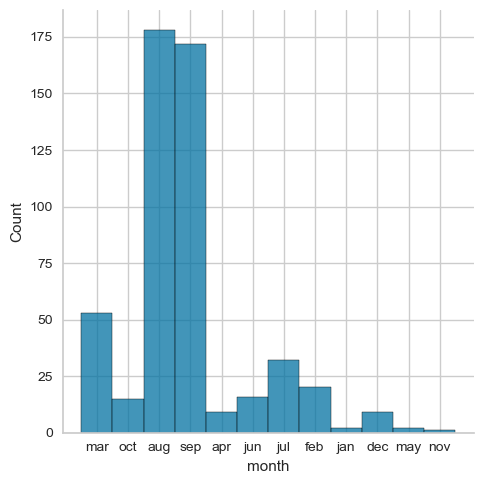

<Figure size 2000x1000 with 0 Axes>

day


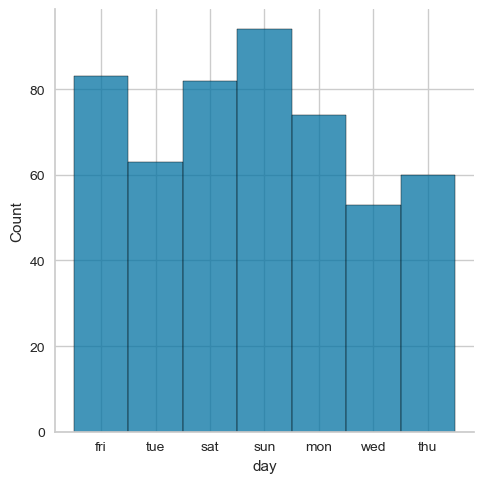

<Figure size 2000x1000 with 0 Axes>

FFMC


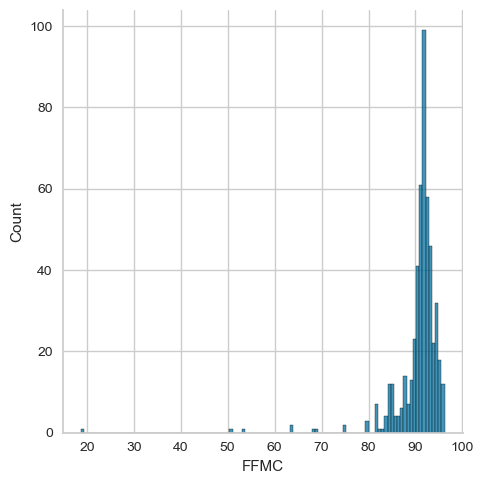

<Figure size 2000x1000 with 0 Axes>

DMC


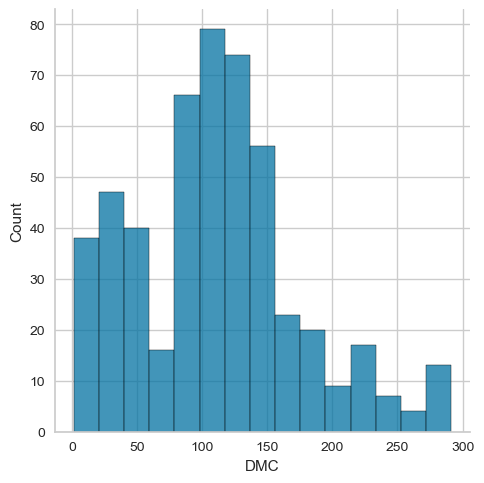

<Figure size 2000x1000 with 0 Axes>

DC


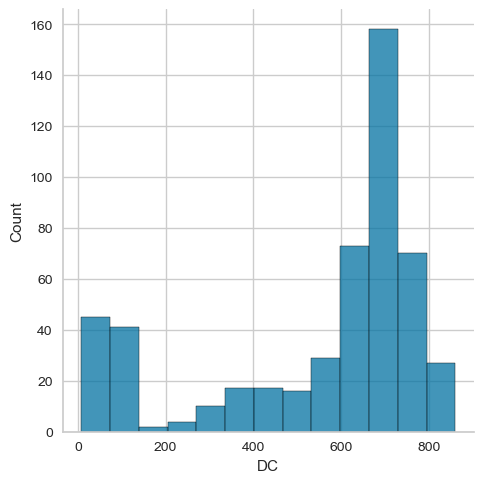

<Figure size 2000x1000 with 0 Axes>

ISI


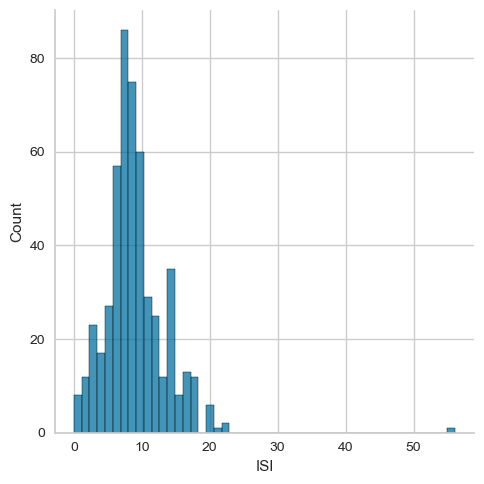

<Figure size 2000x1000 with 0 Axes>

temp


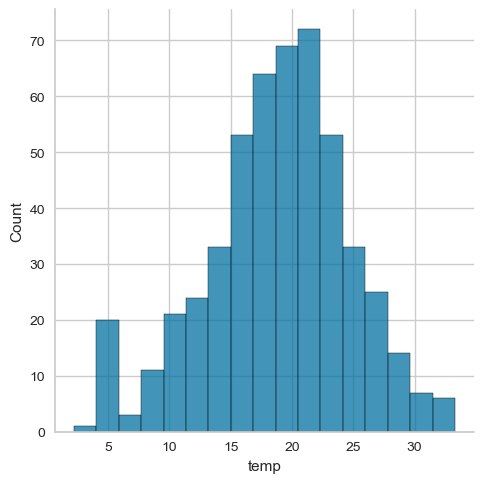

<Figure size 2000x1000 with 0 Axes>

RH


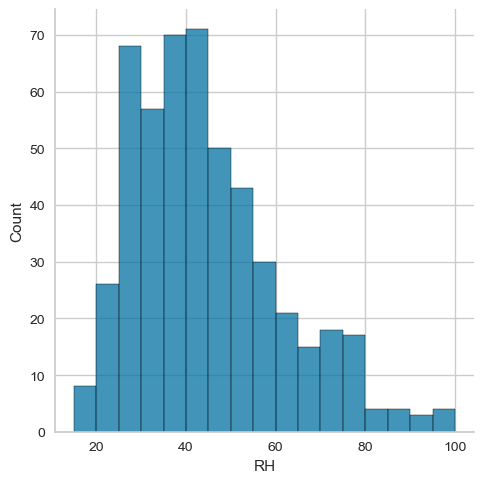

<Figure size 2000x1000 with 0 Axes>

wind


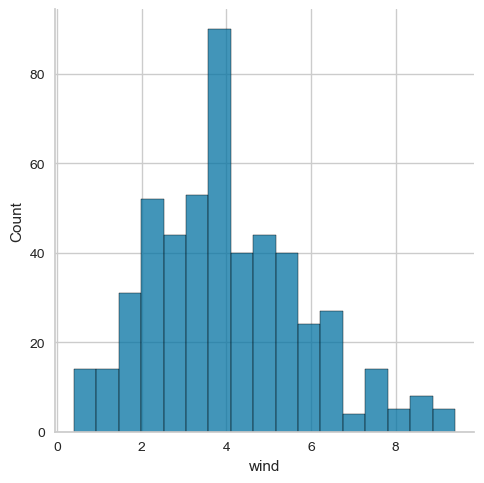

<Figure size 2000x1000 with 0 Axes>

rain


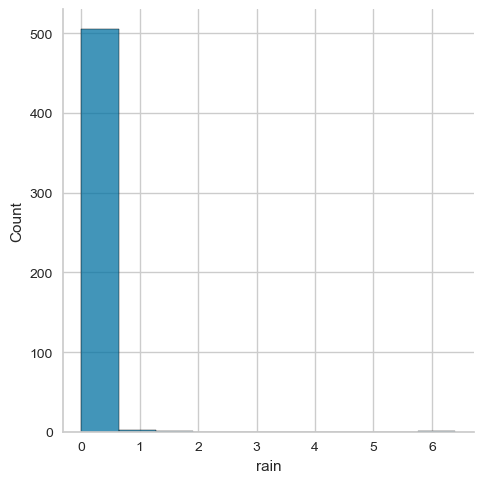

<Figure size 2000x1000 with 0 Axes>

area


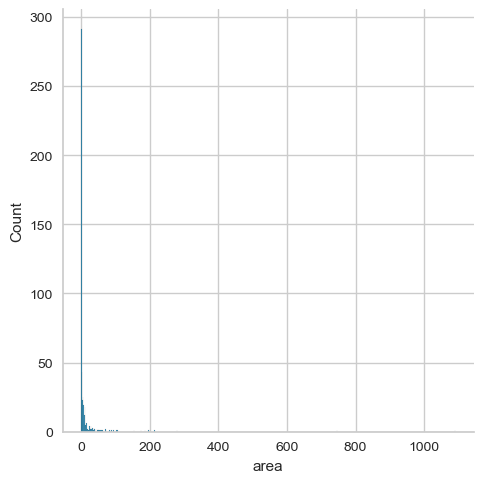

<Figure size 2000x1000 with 0 Axes>

dayfri


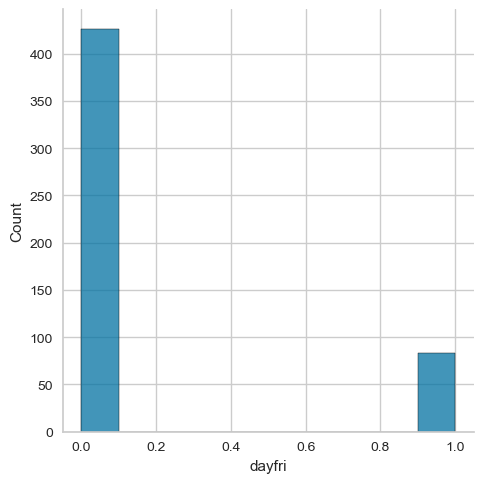

<Figure size 2000x1000 with 0 Axes>

daymon


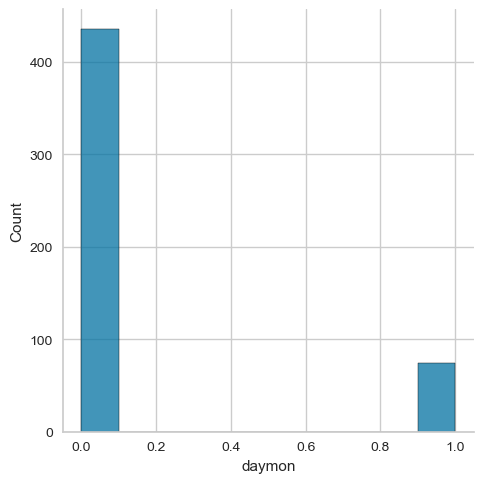

<Figure size 2000x1000 with 0 Axes>

daysat


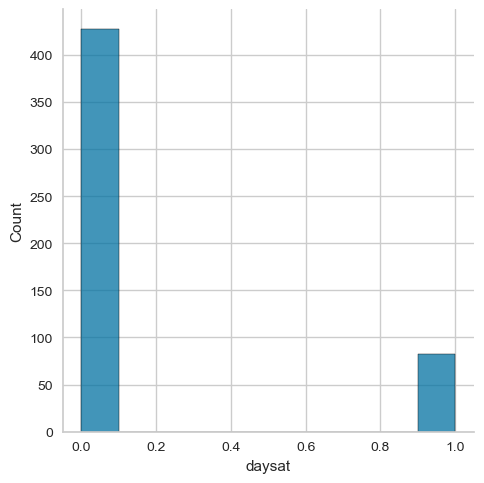

<Figure size 2000x1000 with 0 Axes>

daysun


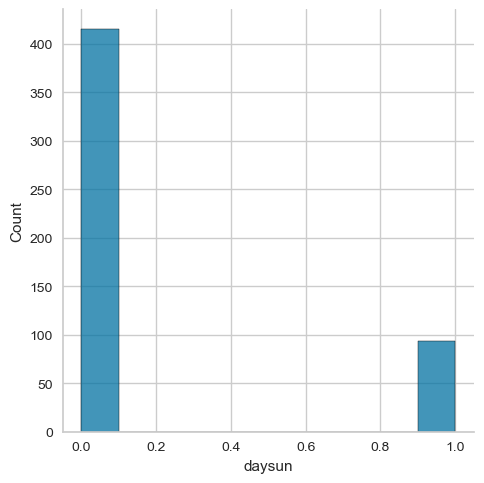

<Figure size 2000x1000 with 0 Axes>

daythu


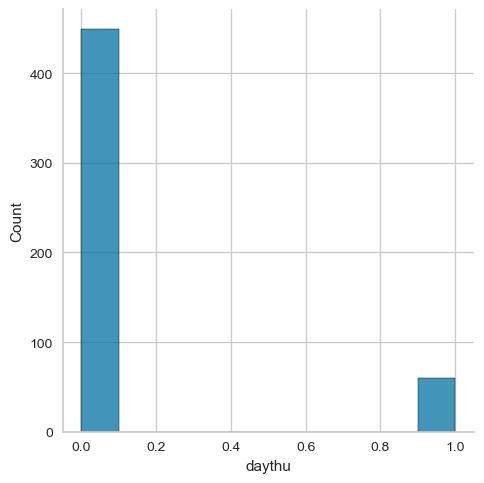

<Figure size 2000x1000 with 0 Axes>

daytue


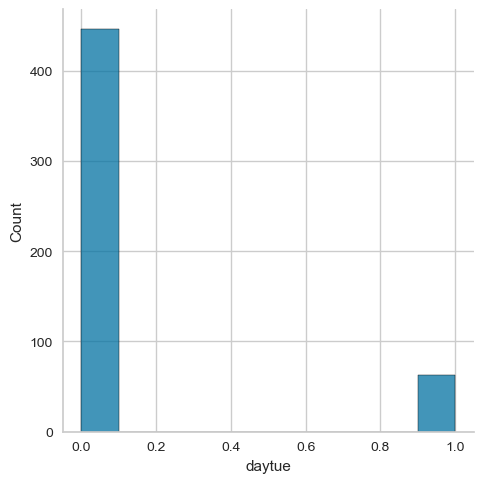

<Figure size 2000x1000 with 0 Axes>

daywed


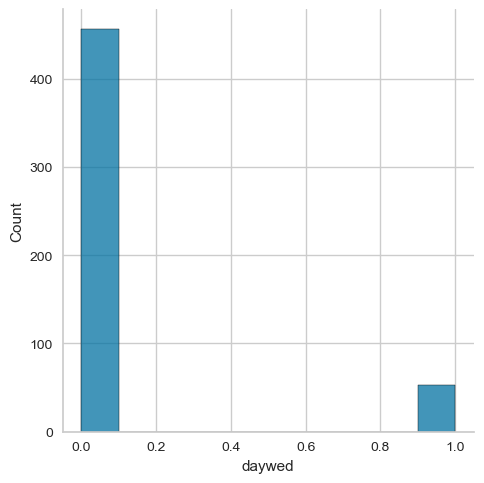

<Figure size 2000x1000 with 0 Axes>

monthapr


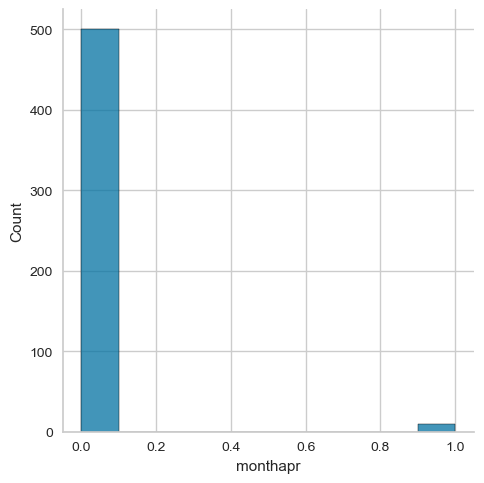

<Figure size 2000x1000 with 0 Axes>

monthaug


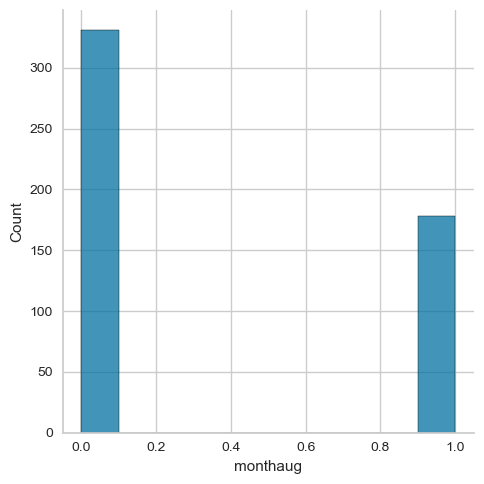

<Figure size 2000x1000 with 0 Axes>

monthdec


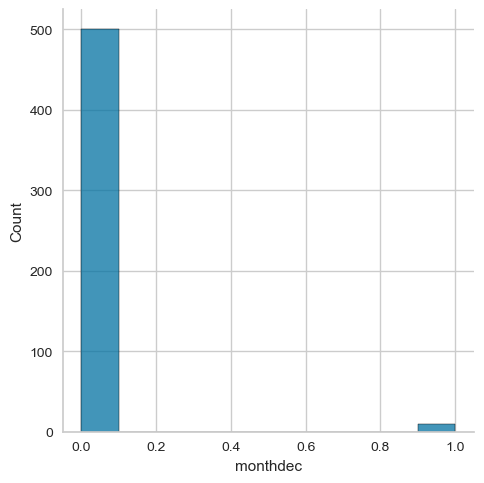

<Figure size 2000x1000 with 0 Axes>

monthfeb


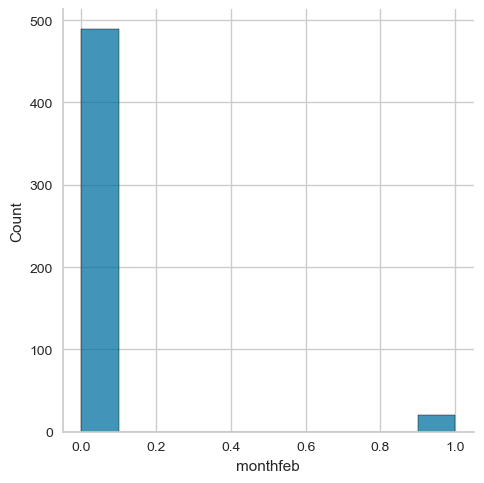

<Figure size 2000x1000 with 0 Axes>

monthjan


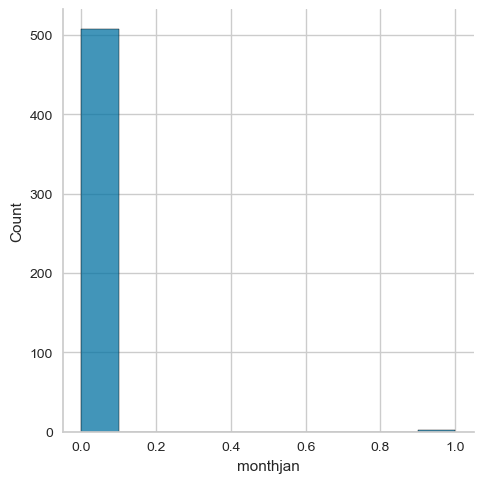

<Figure size 2000x1000 with 0 Axes>

monthjul


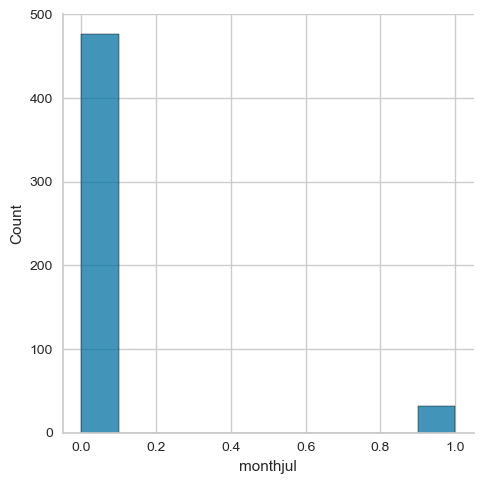

<Figure size 2000x1000 with 0 Axes>

monthjun


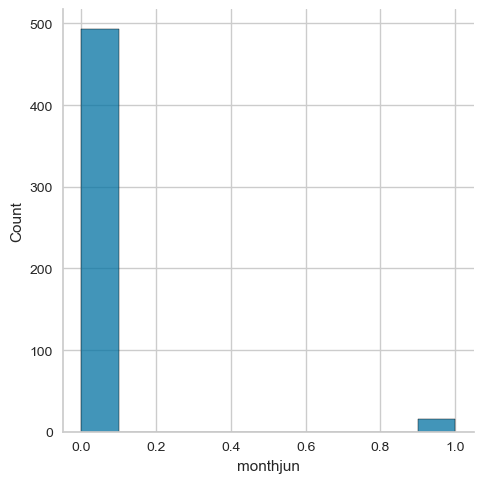

<Figure size 2000x1000 with 0 Axes>

monthmar


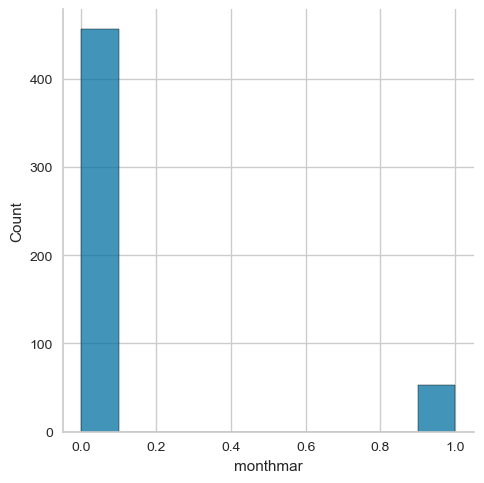

<Figure size 2000x1000 with 0 Axes>

monthmay


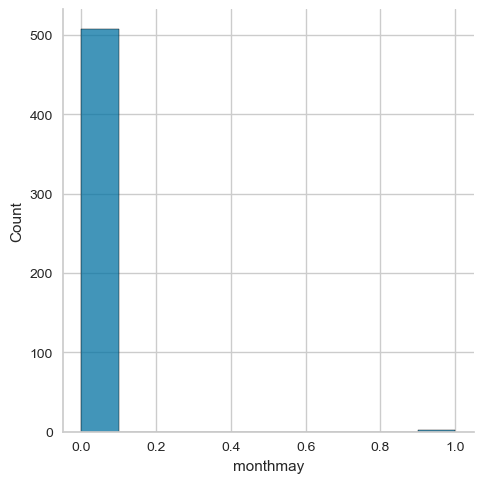

<Figure size 2000x1000 with 0 Axes>

monthnov


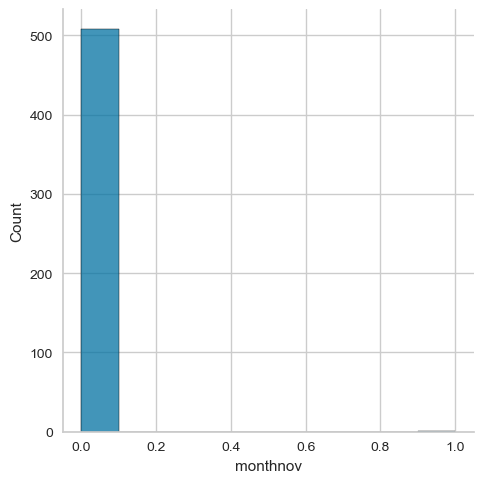

<Figure size 2000x1000 with 0 Axes>

monthoct


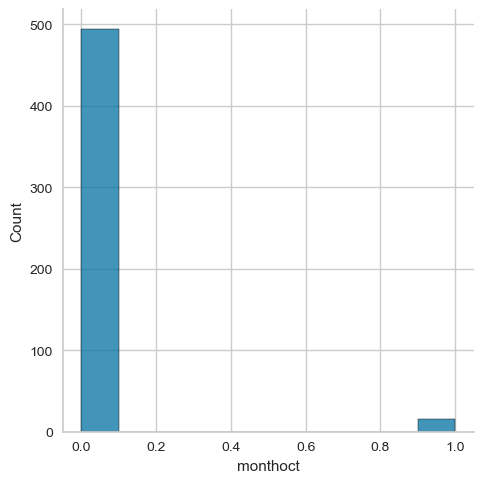

<Figure size 2000x1000 with 0 Axes>

monthsep


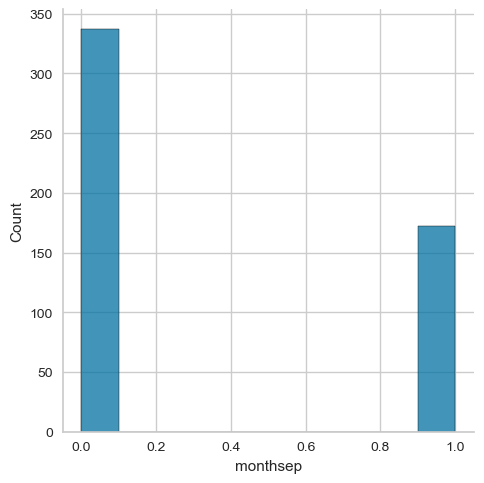

<Figure size 2000x1000 with 0 Axes>

size_category


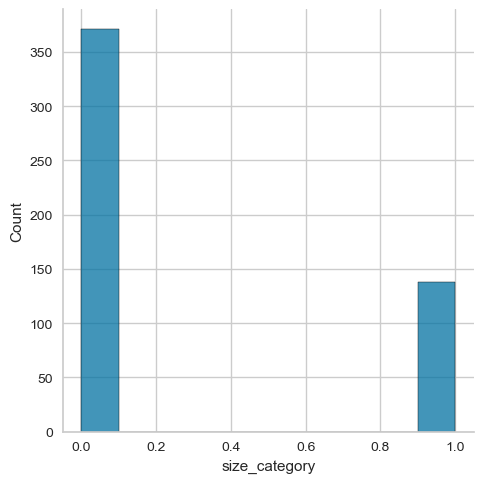

<Figure size 2000x1000 with 0 Axes>

In [41]:
#with skewness and distribution of data 
for n in df.columns:
    print(n)
    sn.displot(df[n])
    plt.figure(figsize=(20,10))
    plt.show()

In [23]:
## we observe that distribution is fairly and contains skewness with possibly being outliers ##

In [42]:
#checking with correlation matrix
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444,0.024292
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779,0.046598
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299,0.028372
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600,-0.007867
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428,0.009976
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631,-0.039730
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211,0.059513
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319,0.053463
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191,0.310561
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903,-0.017980


<AxesSubplot:>

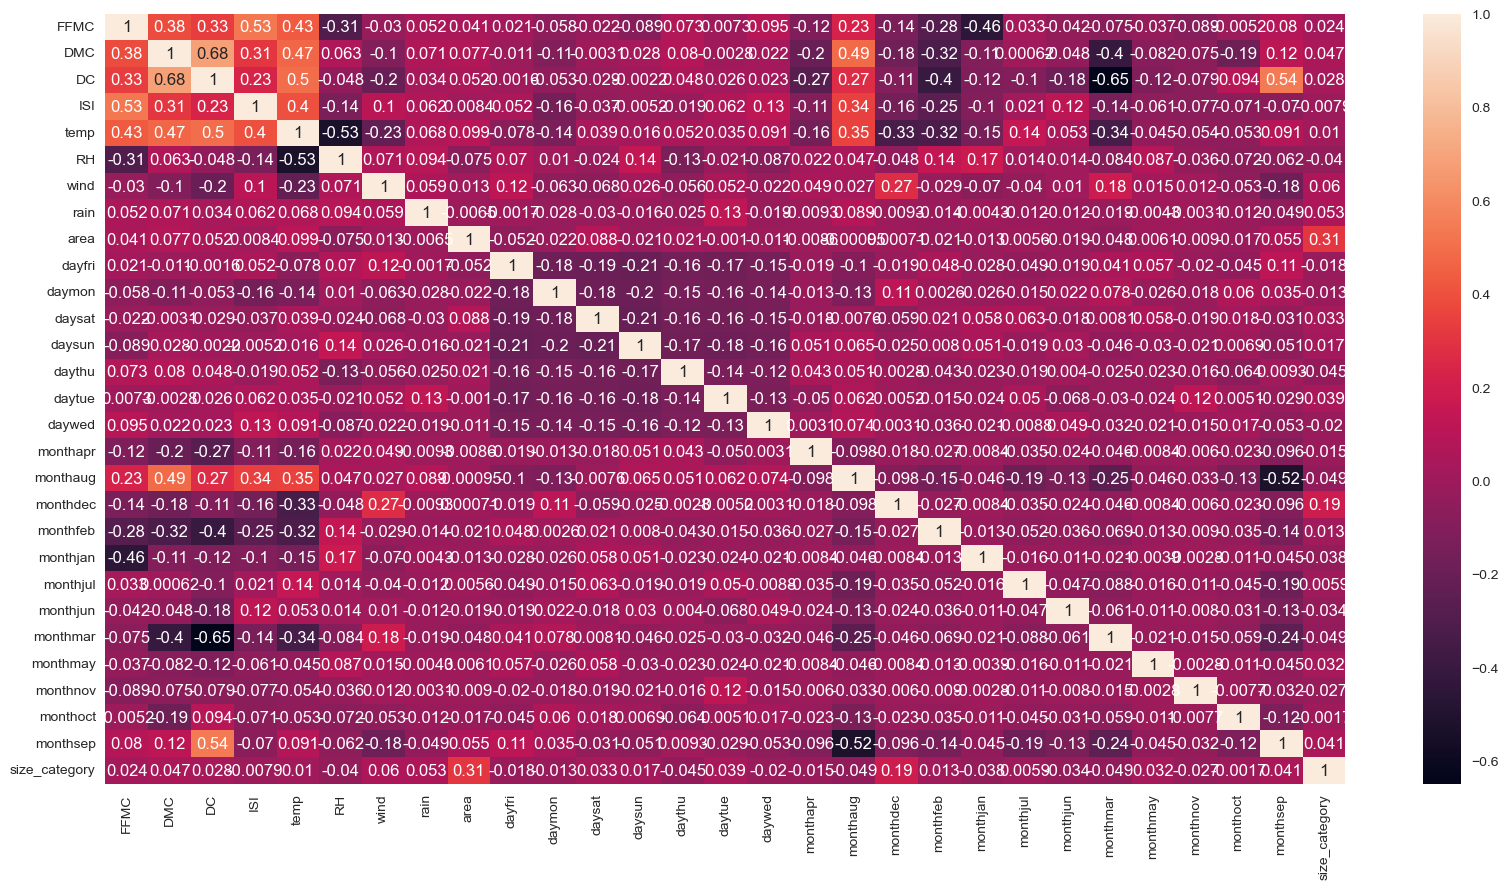

In [44]:
#plotting the maximum correlation with plot 
corr = df.corr()
top_features = corr.index
plt.figure(figsize=(20,10))
sn.heatmap(df[top_features].corr(),annot = True)

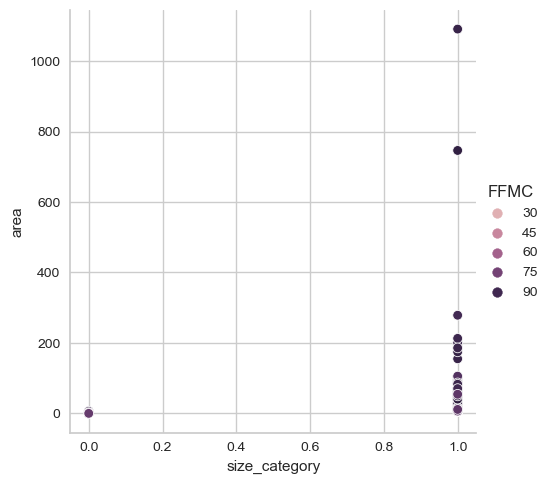

In [76]:
#checking the relation between area and size of damage with hue as FFMC ratio
sn.relplot(data=df,x='size_category',y='area',hue='FFMC')

In [ ]:
## we can understand that at larger affected areas the ffmc ratio is higher while at smaller areas 
## the ratio is lower ##

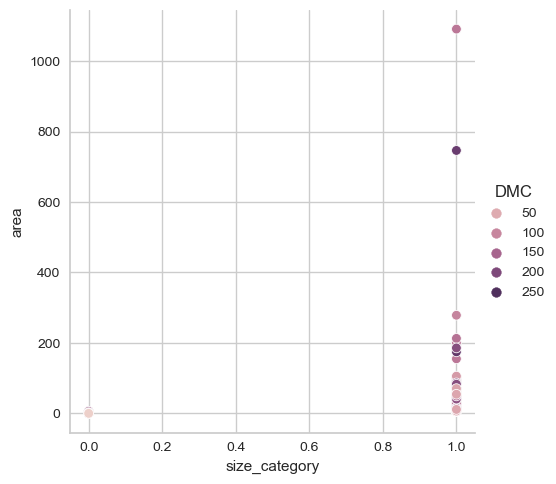

In [77]:
#checking the relation between area and size of damage with hue as DMC ratio
sn.relplot(data=df,x='size_category',y='area',hue='DMC')

In [78]:
## we observe that smaller burnt areas have lower DMC while the areas at larger region have higher DMC ratio ##

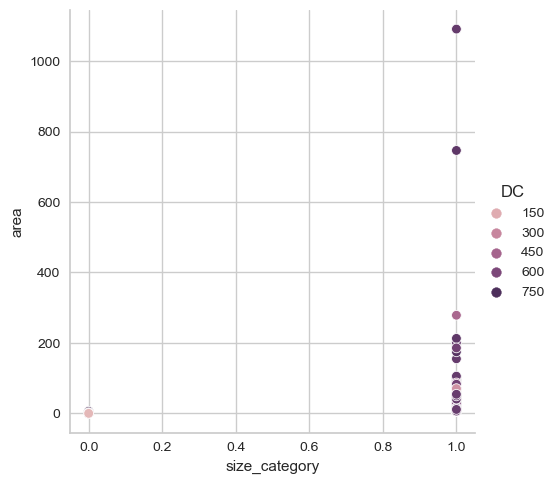

In [79]:
#checking the relation between area and size of damage with hue as DC ratio
sn.relplot(data=df,x='size_category',y='area',hue='DC')

In [ ]:
## we observe that smaller burnt areas have lower DC while the areas at larger region have higher DC ratio 
## with also lower ranges at larger burnt areas.

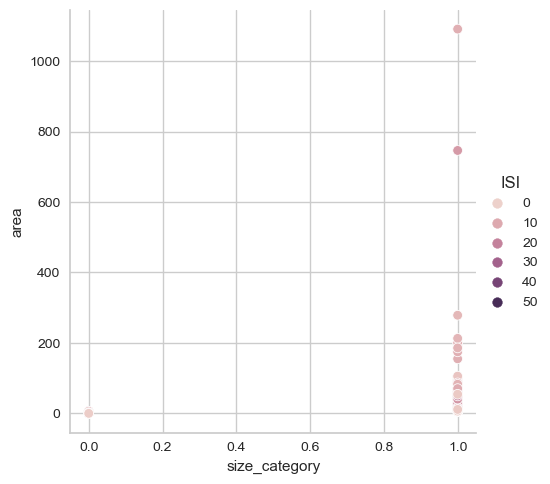

In [80]:
#checking the relation between area and size of damage with hue as ISI ratio
sn.relplot(data=df,x='size_category',y='area',hue='ISI')

In [ ]:
## we can easily observe that lower ISI values indicate of not major forest fires and can be split into three
## categories major,medium and minor ,but some areas have higher value which is exception.

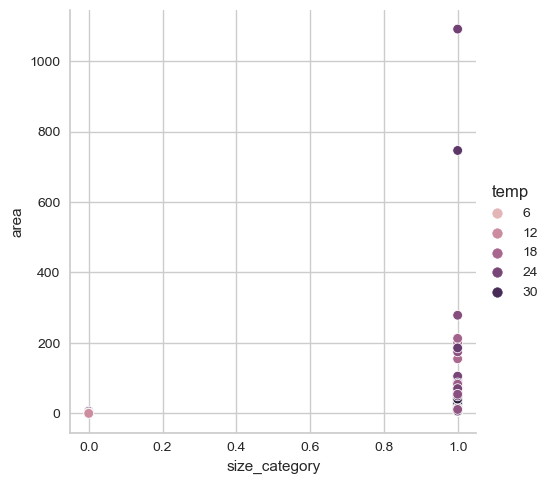

In [81]:
#checking the relation between area and size of damage with hue as temp ratio
sn.relplot(data=df,x='size_category',y='area',hue='temp')

In [82]:
## evidently we observe smaller regions have been affected at lower temperatures while larger regions have been affectd 
## due to rise in temperatures.

Outlier Visualization

<AxesSubplot:>

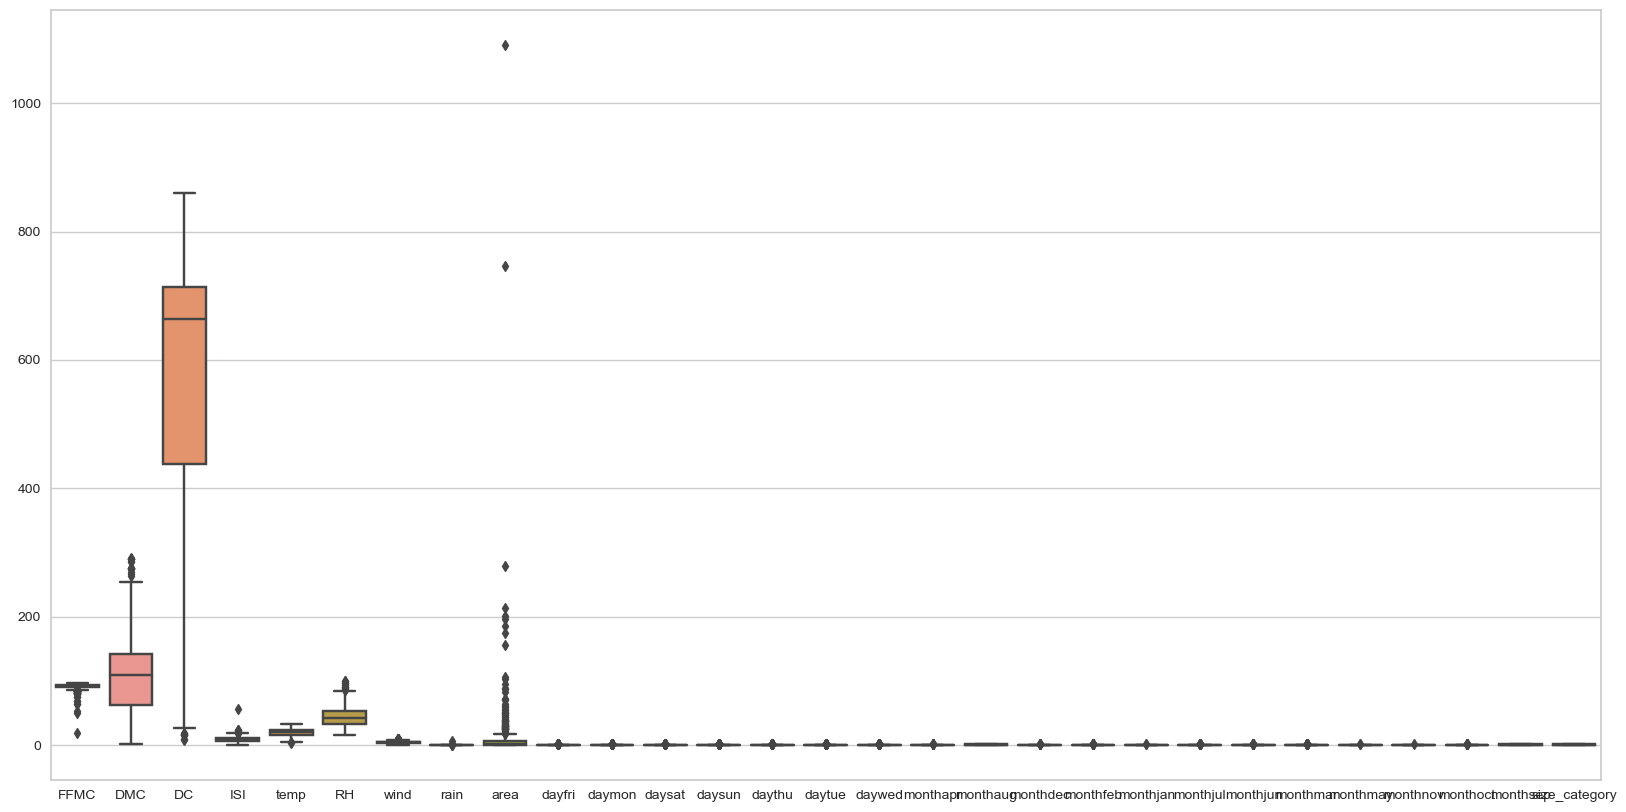

In [83]:
plt.figure(figsize=(20,10))
sn.boxplot(data=df)

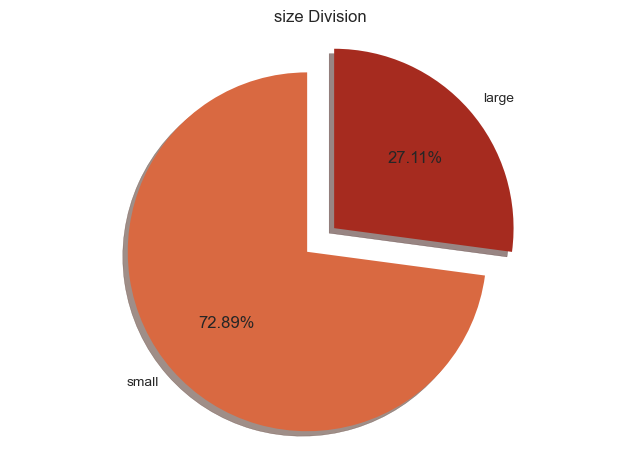

In [88]:
#checking with balance of our dependent data 
labels =['small','large']
colors =['#D96941','#A62B1F']
sizes = [371,138]
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=True,
       explode= (0.1,0.1),autopct ='%1.2f%%')
plt.title('size Division')
plt.axis('equal')
plt.show()

In [87]:
df.size_category.value_counts()

0    371
1    138
Name: size_category, dtype: int64

In [89]:
## we can observe more than 70% is towards one side which can affect accuracy and be biased ##

# EDA 

Outlier Treatment

<AxesSubplot:xlabel='area'>

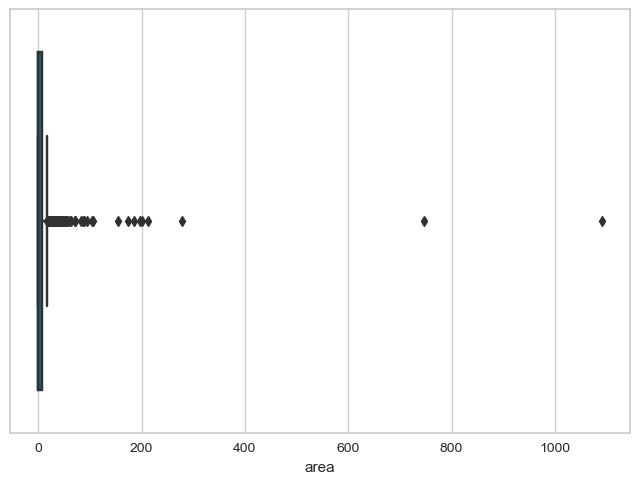

In [199]:
#treating outliers for the feature Area
sn.boxplot(df['area'])

In [200]:
#locating our upper and lower limit
ul = df['area'].quantile(0.99)
ll = df['area'].quantile(0.01)

print(ul,ll)
                          

195.62240000000017 0.0


In [253]:
#trimming the outliers 
df2 = df[(df['area']<=195.62)&(df['area']>0)]

<AxesSubplot:xlabel='area'>

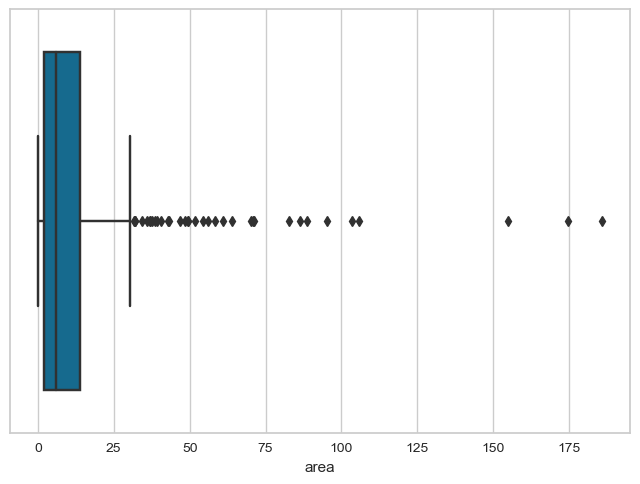

In [254]:
#plotting after trimming the outliers
sn.boxplot(df2['area'])

In [255]:
#capping or winsorization method 
df2['area'] = np.where(df2['area']>=ul,
                      ul,
                      np.where(df2['area']<=ll,
                              ll,
                              df2['area']))

<AxesSubplot:xlabel='area'>

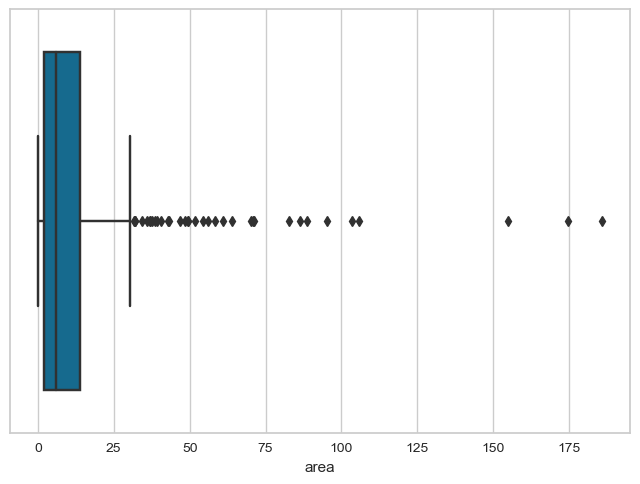

In [256]:
#plotting after capping
sn.boxplot(df2['area'])

In [257]:
#locating for any other outliers
outliers = []
def detect_outlier_iqr(df2):
    df2 = sorted(df2)
    q1 = np.percentile(df2,25)
    q3 = np.percentile(df2,75)
    print(q1,q3)
    iqr = q3-q1
    ll = q1 -(1.5*iqr)
    ul = q3+(1.5*iqr)
    print(ll,ul)
    
    for i in df2:
        if(i<ll or i>ul):
            outlier.append(i)
            return outlier
        outliers = detect_outlier_iqr(df2)
  

In [258]:
print("outliers from iqr method",outliers)

outliers from iqr method []


<AxesSubplot:>

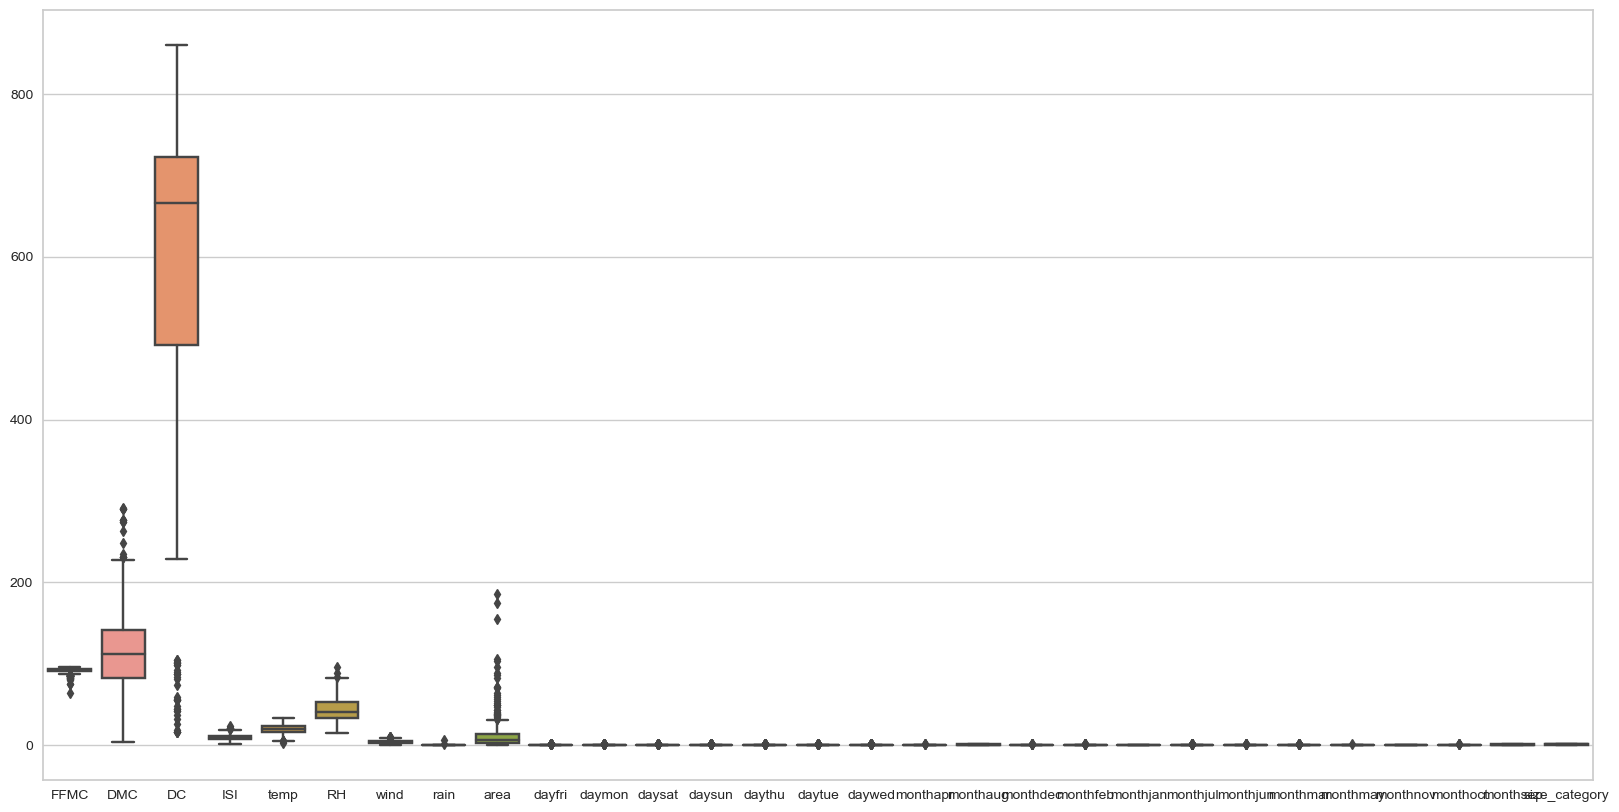

In [259]:
plt.figure(figsize=(20,10))
sn.boxplot(data=df2)

In [260]:
## our data is clean with minimal distance between outliers ##

In [261]:
df2.head ()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
138,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,...,0,0,1,0,0,0,0,0,0,0
139,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,...,0,0,0,0,0,0,0,0,1,0
140,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,...,0,0,0,0,0,0,0,0,1,0
141,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,...,0,0,0,0,0,0,0,0,0,0
142,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
#converting feature day to numerical 

df2['day'] = df2['day'].map({'mon': 1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,
                              'sun':7 })



In [268]:
df2.head().reset_index()

,index,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,month_number
0,138,jul,2,85.8,48.3,313.4,3.9,18.0,42,2.7,...,0,1,0,0,0,0,0,0,0,7
1,139,sep,2,91.0,129.5,692.6,7.0,21.7,38,2.2,...,0,0,0,0,0,0,0,1,0,9
2,140,sep,1,90.9,126.5,686.5,7.0,21.9,39,1.8,...,0,0,0,0,0,0,0,1,0,9
3,141,aug,3,95.5,99.9,513.3,13.2,23.3,31,4.5,...,0,0,0,0,0,0,0,0,0,8
4,142,aug,5,90.1,108.0,529.8,12.5,21.2,51,8.9,...,0,0,0,0,0,0,0,0,0,8


In [264]:
#converting our month column from object to integer
df2['month_number'] = pd.to_datetime(df2['month'], format='%b').dt.month
df2['month_number'] = df2['month_number'].astype(int)

In [270]:
#dropping month column
df2.drop('month',axis = 1)

,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,month_number
138,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,...,0,1,0,0,0,0,0,0,0,7
139,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,...,0,0,0,0,0,0,0,1,0,9
140,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,...,0,0,0,0,0,0,0,1,0,9
141,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,...,0,0,0,0,0,0,0,0,0,8
142,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,...,0,0,0,0,0,0,0,0,0,8
510,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,...,0,0,0,0,0,0,0,0,0,8
512,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,...,0,0,0,0,0,0,0,0,1,8
513,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,...,0,0,0,0,0,0,0,0,1,8


In [278]:
#reset index
df2.reset_index(drop=True).drop('month',axis = 1)

,month_number,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,...,0,0,1,0,0,0,0,0,0,0
1,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,...,0,0,0,0,0,0,0,0,1,0
2,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,...,0,0,0,0,0,0,0,0,0,0
4,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,8,5,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,...,0,0,0,0,0,0,0,0,0,0
259,8,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,...,0,0,0,0,0,0,0,0,0,0
260,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
261,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1


In [275]:
#rearranging the columns 
df2 = df2[[df2.columns[-1]] + list(df2.columns[:-1])]
df2 = df2[['month_number'] + [col for col in df2.columns if col != 'month_number']]


In [293]:
df2.head().reset_index(drop=True).drop('month',axis = 1)

,month_number,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,...,0,0,1,0,0,0,0,0,0,0
1,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,...,0,0,0,0,0,0,0,0,1,0
2,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,...,0,0,0,0,0,0,0,0,0,0
4,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,...,0,0,0,0,0,0,0,0,0,0


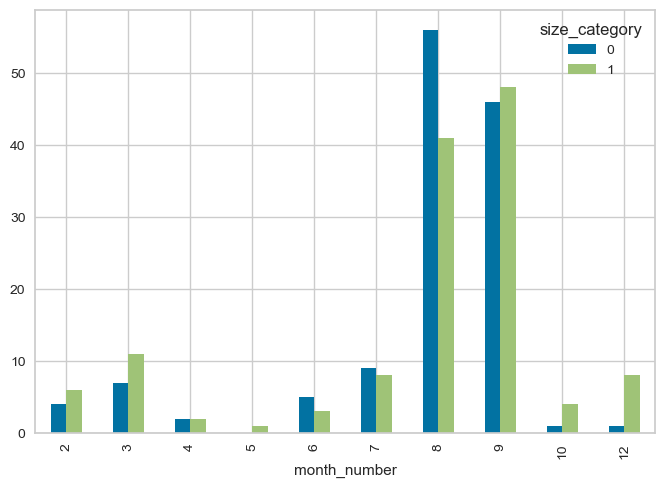

In [319]:
#plotting month against forest regions burns to know which season affects more 
pd.crosstab(df2.month_number,df2.size_category).plot(kind='bar')
plt.show()

In [ ]:
## as we observe the plot we see that larger areas are affected in the month of  september and august
## while the smaller regions are affected most in the month of august comparatively to spetember

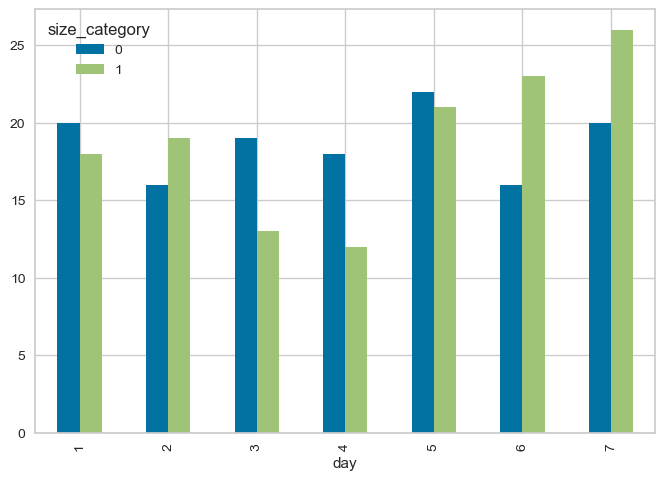

In [320]:
#plotting day against forest regions burns to know which days affects more 
pd.crosstab(df2.day,df2.size_category).plot(kind='bar')
plt.show()

In [282]:
## as we get into on day analysis for larger areas most of incidents have happened on sunday while least on thursday,
## but smaller regions most incidents have happened on friday and least on tuesday

# Feature engineering and selection

In [298]:
df3 = df2.drop('month',axis = 1).reset_index(drop= True)

In [301]:
#chi square analysis 
#splitting our data into independent and dependent variables 
X = df3.iloc[:,0:30]
y = df3.iloc[:,30]

print(X.shape,y.shape)

(263, 30) (263,)


In [302]:
df3.shape

(263, 31)

In [303]:
best_feat = SelectKBest(score_func= chi2,k=10)
feat_sel = best_feat.fit(X,y)

In [304]:
#summarise scores 
scores = feat_sel.scores_

features = feat_sel.transform(X)

In [305]:
#fitting our scores in Dataframe
score_df = pd.DataFrame(list(zip(scores,X.columns)),
                       columns =['score','Feature'])
score_df.sort_values(by="score",ascending=False,inplace=True)
score_df

,score,Feature
10,2694.495073,area
4,107.788636,DC
20,5.391421,monthdec
9,3.167264,rain
6,2.604607,temp
19,2.435094,monthaug
28,1.777284,monthoct
7,1.768844,RH
5,1.494850,ISI
15,1.246079,daythu


In [316]:
#plotting feature  selection by mutual importances
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [317]:
print(model.feature_importances_)

[0.01989002 0.02194414 0.05602835 0.05557163 0.04667456 0.04853956
 0.07438578 0.07977976 0.0693047  0.00253275 0.37800769 0.01147774
 0.00906883 0.01247809 0.01462036 0.01033219 0.01224739 0.01377644
 0.00173437 0.01394038 0.01033132 0.00267834 0.         0.0083912
 0.00557688 0.00454834 0.00137806 0.         0.00555135 0.00920979]


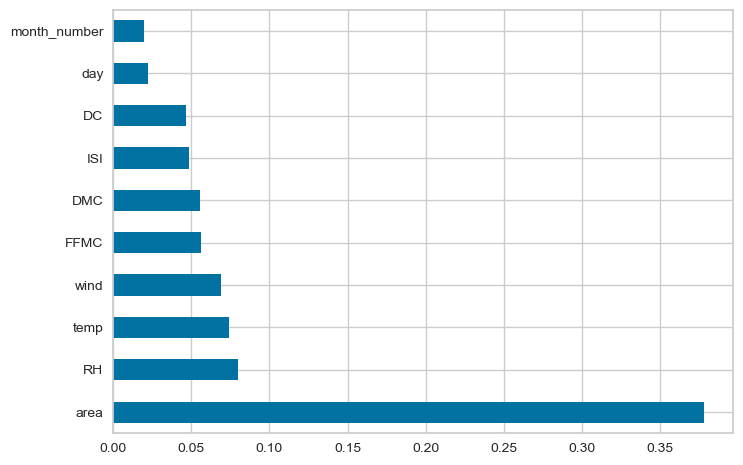

In [318]:
#selection for our top 10 features
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [338]:
#selecting our best 10 features 
df4 = df3[['month_number','day','FFMC','DMC','ISI','DC',
           'temp','wind','RH','area','size_category']]

In [339]:
df4.head()

,month_number,day,FFMC,DMC,ISI,DC,temp,wind,RH,area,size_category
0,7,2,85.8,48.3,3.9,313.4,18.0,2.7,42,0.36,0
1,9,2,91.0,129.5,7.0,692.6,21.7,2.2,38,0.43,0
2,9,1,90.9,126.5,7.0,686.5,21.9,1.8,39,0.47,0
3,8,3,95.5,99.9,13.2,513.3,23.3,4.5,31,0.55,0
4,8,5,90.1,108.0,12.5,529.8,21.2,8.9,51,0.61,0


In [340]:
#checking the balance of our data
df4.size_category.value_counts()

1    132
0    131
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category'>

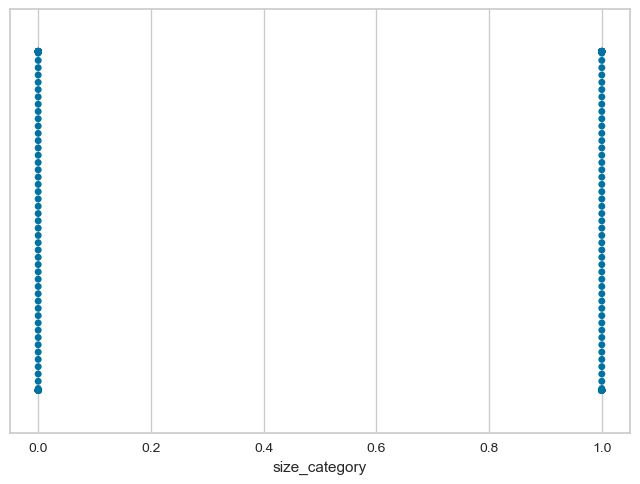

In [341]:
#plotting for balance 
sn.swarmplot(df4['size_category'])

In [328]:
## so after performing eda and feature techniques our dependent data is well balanced with less variation ##

# Neural Network hyperparameter tuning

In [347]:
#splitting our independent and dependent variables 
X2 = df4.iloc[:,0:10]
y2 = df4.iloc[:,10]

print(X2.shape,y2.shape)

(263, 10) (263,)


In [351]:
std = StandardScaler()
df_scaled = std.fit_transform(X2)
df_scaled

array([[-0.36151664, -1.0484103 , -1.39365957, ..., -0.74731159,
        -0.12498425, -0.56861019],
       [ 0.58454183, -1.0484103 , -0.00315193, ..., -1.01155325,
        -0.38953844, -0.56585017],
       [ 0.58454183, -1.53300065, -0.02989246, ..., -1.22294658,
        -0.3233999 , -0.56427301],
       ...,
       [ 0.11151259,  1.37454145, -2.51676189, ..., -0.74731159,
        -0.78636973, -0.32888228],
       [ 0.11151259,  1.37454145, -2.51676189, ...,  0.89098671,
         1.79303364,  1.55779217],
       [ 0.11151259,  1.37454145, -2.51676189, ...,  1.3666217 ,
         1.72689509, -0.14277771]])

In [358]:
#fitting our scaled values 
X2 = df_scaled
X2

array([[-0.36151664, -1.0484103 , -1.39365957, ..., -0.74731159,
        -0.12498425, -0.56861019],
       [ 0.58454183, -1.0484103 , -0.00315193, ..., -1.01155325,
        -0.38953844, -0.56585017],
       [ 0.58454183, -1.53300065, -0.02989246, ..., -1.22294658,
        -0.3233999 , -0.56427301],
       ...,
       [ 0.11151259,  1.37454145, -2.51676189, ..., -0.74731159,
        -0.78636973, -0.32888228],
       [ 0.11151259,  1.37454145, -2.51676189, ...,  0.89098671,
         1.79303364,  1.55779217],
       [ 0.11151259,  1.37454145, -2.51676189, ...,  1.3666217 ,
         1.72689509, -0.14277771]])

Tuning hyperparameters 

1 Batch size

2 Epochs

In [367]:
#create model 
def create_model():
    model = Sequential(name='Hyperparameter-tuning-dummy')
    model.add(Dense(11,input_dim = 10,kernel_initializer='uniform',activation = 'relu'))
    model.add(Dense(8,input_dim = 10,kernel_initializer='uniform',activation = 'relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss= 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
    return model
    

In [368]:
#fitting our keras classifier model 
model = KerasClassifier(build_fn=create_model,verbose = 0)
batch_size = [20,30,40]
epochs = [40,80,100]
param_grid = dict(batch_size=batch_size,epochs=epochs)

In [369]:
#fitting our model parameters 
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=10)
grid_results = grid.fit(X2,y2)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=20, epochs=40....................................
[CV 1/5; 1/9] END .....batch_size=20, epochs=40;, score=0.943 total time=   1.7s
[CV 2/5; 1/9] START batch_size=20, epochs=40....................................
[CV 2/5; 1/9] END .....batch_size=20, epochs=40;, score=1.000 total time=   1.2s
[CV 3/5; 1/9] START batch_size=20, epochs=40....................................
[CV 3/5; 1/9] END .....batch_size=20, epochs=40;, score=0.981 total time=   1.2s
[CV 4/5; 1/9] START batch_size=20, epochs=40....................................
[CV 4/5; 1/9] END .....batch_size=20, epochs=40;, score=0.827 total time=   1.3s
[CV 5/5; 1/9] START batch_size=20, epochs=40....................................
[CV 5/5; 1/9] END .....batch_size=20, epochs=40;, score=0.923 total time=   2.1s
[CV 1/5; 2/9] START batch_size=20, epochs=80....................................
[CV 1/5; 2/9] END .....batch_size=20, epochs=80;,

In [370]:
#summarise the results
print('Best:{},using {}'.format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with: {}'.format(mean,stdev,param))

Best:0.9542815685272217,using {'batch_size': 40, 'epochs': 40}
0.9349056601524353,0.060409276666141716 with: {'batch_size': 20, 'epochs': 40}
0.9273584961891175,0.049337489730267664 with: {'batch_size': 20, 'epochs': 80}
0.9426705360412597,0.036642657223069135 with: {'batch_size': 20, 'epochs': 100}
0.9464441180229187,0.041108632511423555 with: {'batch_size': 30, 'epochs': 40}
0.9388243794441223,0.04117007885138433 with: {'batch_size': 30, 'epochs': 80}
0.9465166926383972,0.03733008234800895 with: {'batch_size': 30, 'epochs': 100}
0.9542815685272217,0.02589806814303921 with: {'batch_size': 40, 'epochs': 40}
0.9426705360412597,0.0365671209202107 with: {'batch_size': 40, 'epochs': 80}
0.9426705360412597,0.04206997037534489 with: {'batch_size': 40, 'epochs': 100}


Tuning hyperparameters 

1 Learning Rate

2 Dropout Rate

In [389]:
#create model 
def create_model(learning_rate,dropout_rate):

    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer='uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(11,input_dim = 10,kernel_initializer='uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss= 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
    return model
    

In [390]:
#fitting our keras classifier model 
model = KerasClassifier(build_fn=create_model,verbose = 0,batch_size = 40,epochs=40)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

In [391]:
#fitting our model parameters 
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=10)
grid_results = grid.fit(X2,y2)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.943 total time=   1.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   1.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.925 total time=   1.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.827 total time=   1.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.885 total time=   1.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END d

In [392]:
#summarise the results
print('Best:{},using {}'.format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with: {}'.format(mean,stdev,param))

Best:0.9539912939071655,using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9158925890922547,0.05796364576348675 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9539912939071655,0.043263760083176735 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8135703921318054,0.023006070332130344 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9121190190315247,0.04986093086076271 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9351959347724914,0.0393652930353131 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7720609664916992,0.1083409476612587 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9084179997444153,0.039653206690989276 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.935268497467041,0.04441171253357424 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7947024703025818,0.06677541860062067 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}


Tuning hyperparameters for 

1 Activation function

2 Kernel Initializer

In [393]:
#create model 
def create_model(activation_function,init):

    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer=init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(11,input_dim = 10,kernel_initializer=init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss= 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
    return model
    

In [400]:
#fitting our keras classifier model 
model = KerasClassifier(build_fn=create_model,verbose = 0,batch_size = 40,epochs=40)
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
param_grid = dict(activation_function=activation_function,init=init)

In [402]:
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X2,y2)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.925 total time=   1.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.943 total time=   1.0s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.943 total time=   1.3s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.808 total time=   2.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.904 total time=   1.0s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [404]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9731495022773743, using {'activation_function': 'linear', 'init': 'uniform'}
0.9045718312263489,0.05059465942063207 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8970246911048889,0.04172834163518804 with: {'activation_function': 'softmax', 'init': 'normal'}
0.9693759083747864,0.0356376319801244 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9579100251197815,0.030843081267334288 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9197387576103211,0.046469844014579174 with: {'activation_function': 'relu', 'init': 'normal'}
0.36995646357536316,0.1647864114124258 with: {'activation_function': 'relu', 'init': 'zero'}
0.9730769157409668,0.03768446263516043 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9463715553283691,0.044629851856094305 with: {'activation_function': 'tanh', 'init': 'normal'}
0.3658926010131836,0.16149640191194514 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9731495022773743,0.026107670849732614 with: {'act

tuning hyperparameters number of Neurons

In [405]:
#create model 
def create_model(neuron1,neuron2):

    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer='uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = 10,kernel_initializer='uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss= 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
    return model
    

In [406]:
#fitting our keras classifier model 
model = KerasClassifier(build_fn=create_model,verbose = 0,batch_size = 40,epochs=40)
neuron1 = [10,15,20]
neuron2 = [5,10,15]
param_grid = dict(neuron1=neuron1,neuron2=neuron2)

In [408]:
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X2,y2)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=10, neuron2=5.......................................
[CV 1/5; 1/9] END ........neuron1=10, neuron2=5;, score=0.906 total time=   1.0s
[CV 2/5; 1/9] START neuron1=10, neuron2=5.......................................
[CV 2/5; 1/9] END ........neuron1=10, neuron2=5;, score=1.000 total time=   0.9s
[CV 3/5; 1/9] START neuron1=10, neuron2=5.......................................
[CV 3/5; 1/9] END ........neuron1=10, neuron2=5;, score=1.000 total time=   1.0s
[CV 4/5; 1/9] START neuron1=10, neuron2=5.......................................
[CV 4/5; 1/9] END ........neuron1=10, neuron2=5;, score=0.923 total time=   0.9s
[CV 5/5; 1/9] START neuron1=10, neuron2=5.......................................
[CV 5/5; 1/9] END ........neuron1=10, neuron2=5;, score=0.942 total time=   1.0s
[CV 1/5; 2/9] START neuron1=10, neuron2=10......................................
[CV 1/5; 2/9] END .......neuron1=10, neuron2=10;,

In [409]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9656023263931275, using {'neuron1': 20, 'neuron2': 15}
0.9542090058326721,0.03914446430425965 with: {'neuron1': 10, 'neuron2': 5}
0.9579825878143311,0.028207203567611673 with: {'neuron1': 10, 'neuron2': 10}
0.9541364312171936,0.03351601535876474 with: {'neuron1': 10, 'neuron2': 15}
0.9579825878143311,0.028207203567611673 with: {'neuron1': 15, 'neuron2': 5}
0.96175616979599,0.03205181908020874 with: {'neuron1': 15, 'neuron2': 10}
0.9653846144676208,0.04282895836647356 with: {'neuron1': 15, 'neuron2': 15}
0.957837450504303,0.042842978901744995 with: {'neuron1': 20, 'neuron2': 5}
0.954063868522644,0.035754921892166974 with: {'neuron1': 20, 'neuron2': 10}
0.9656023263931275,0.025536019613935725 with: {'neuron1': 20, 'neuron2': 15}


# tuning our final neural network with all hyperparameters

In [410]:
#create model 
def create_model():

    model = Sequential()
    model.add(Dense(20,input_dim = 10,kernel_initializer='uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(15,input_dim = 20,kernel_initializer='uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss= 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
    return model
    

In [411]:
#fitting our keras classifier model 
model = KerasClassifier(build_fn=create_model,verbose = 0,batch_size = 40,epochs=40)


In [412]:
#fitting the model
model.fit(X2,y2)


In [413]:
#prediction on trained model 
pred = model.predict(X2)
pred

9/9 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [414]:
#checking the accuracy score 
print(accuracy_score(y2,pred))

0.973384030418251


In [415]:
#confusion matrix 
print(confusion_matrix(y2,pred))

[[128   3]
 [  4 128]]


In [416]:
#classification report 
print(classification_report(y2,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       131
           1       0.98      0.97      0.97       132

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263



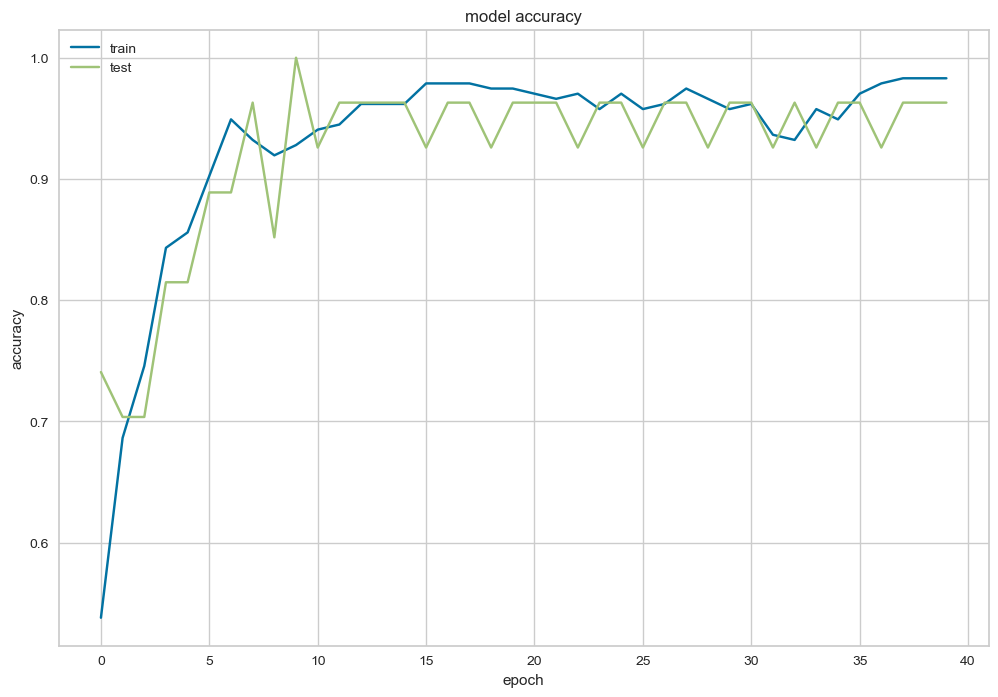

In [417]:
#final plot with accuracy of train and test
history = model.fit(X2,y2,validation_split = 0.1, epochs=40, batch_size=40)
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# conclusions

1 The neural network is unaffected by the outliers impact when the percentage-outliers in the training data is lower than 15%. but for better performance EDA and feature selection is important

2 Neural network has issues with time complexity therefore feature scaling and feature selection is necessary also 
dimension reduction can reduce the complexity

3 since we cant see the process within neural network hence they are also called as black box models.

4 neural network also has ability to perform parallel processing 

5 neural network need high processing time for big neural networks